In [1]:
# importing the required module 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from statistics import mean, stdev
from scipy.stats import sem
import scipy.stats as stats

In [2]:
#Optional for disabling warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [4]:
df = pd.read_excel (r'./Bio_212_Exam_3.xlsx', index_col=0) 
df.describe()

,Unnamed: 1,Unnamed: 2,Score
count,0.0,0.0,24.000000
mean,NaN,NaN,78.983333
std,NaN,NaN,18.164003
min,NaN,NaN,43.500000
25%,NaN,NaN,65.875000
50%,NaN,NaN,81.450000
75%,NaN,NaN,94.700000
max,NaN,NaN,100.000000


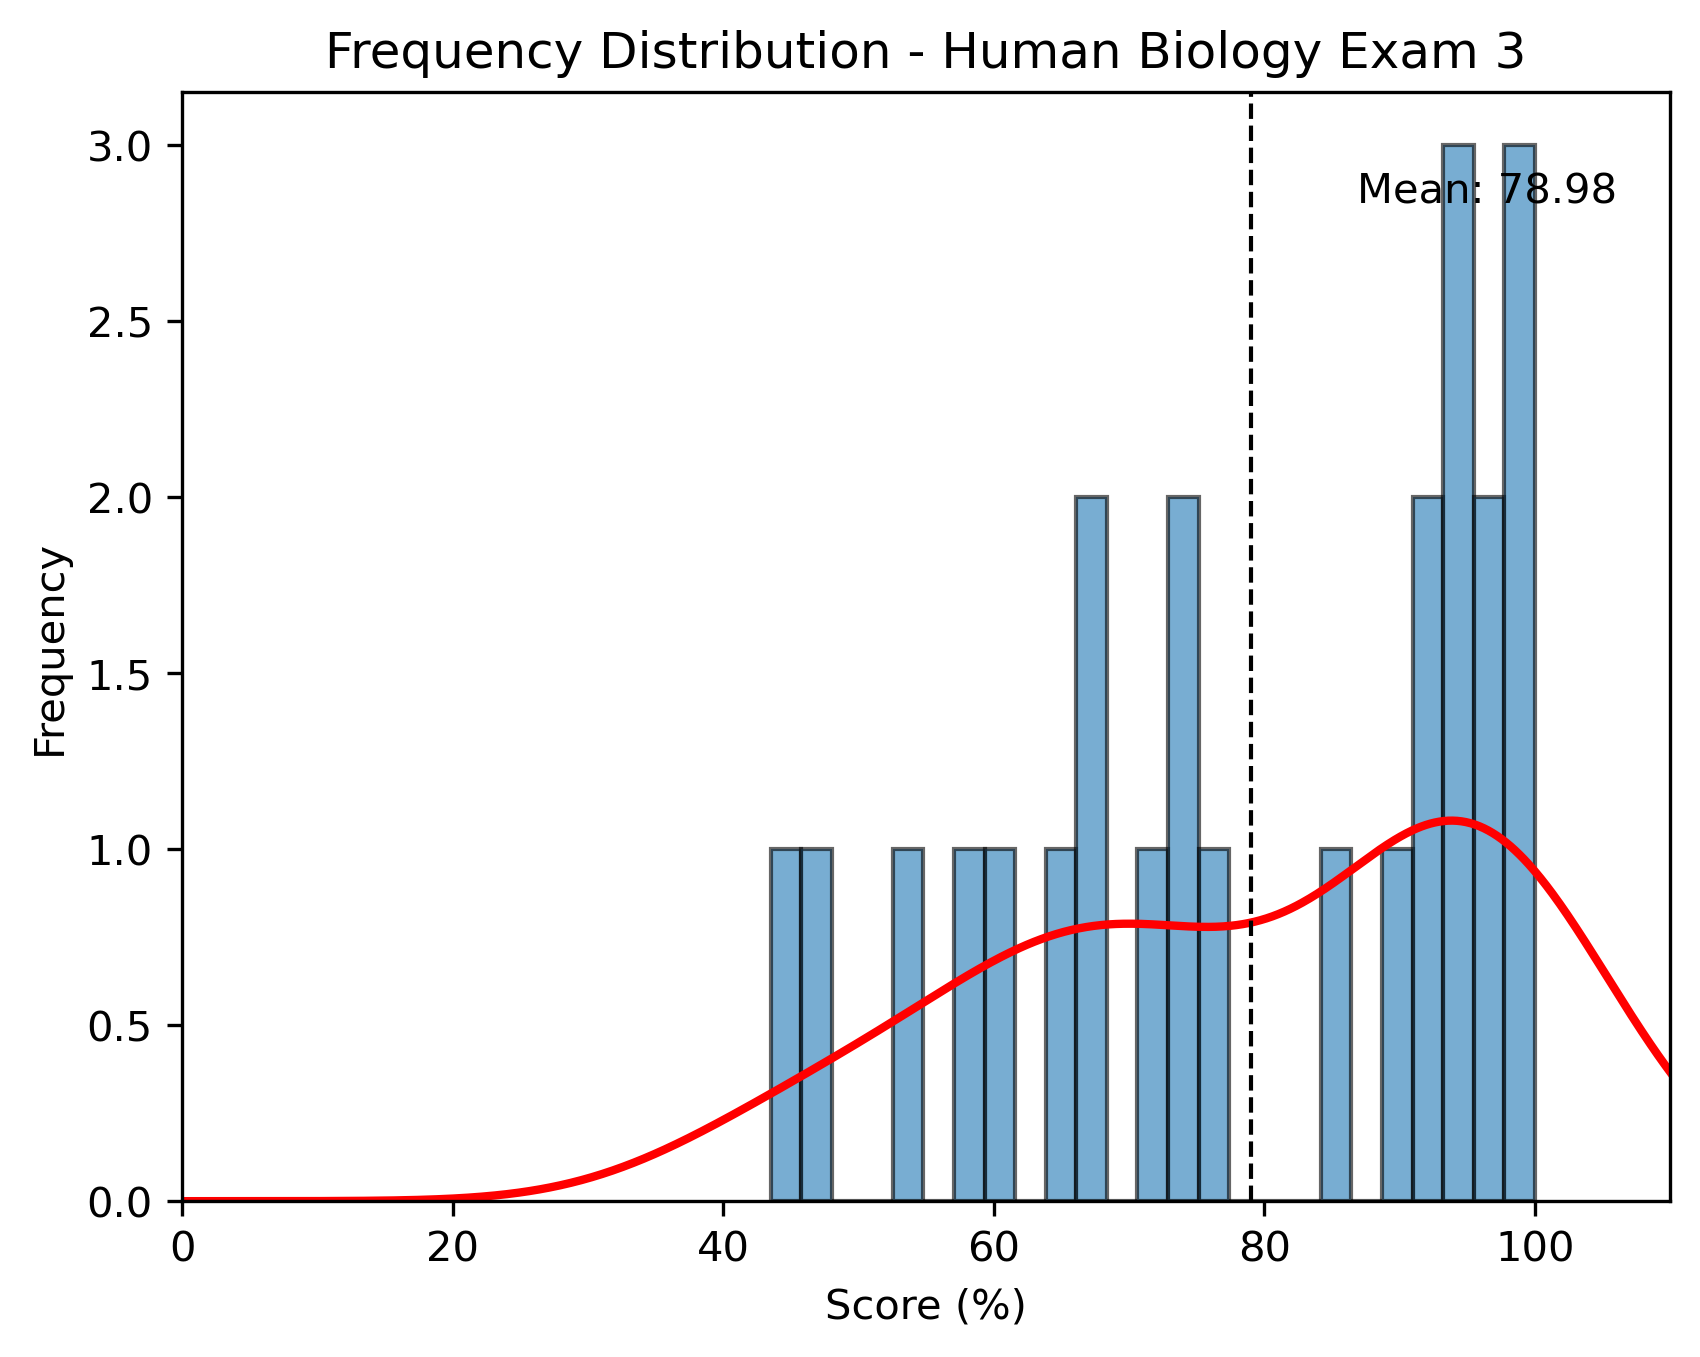

In [7]:
# Plot Histogram on x
x1 = df['Score'].dropna()

# Define number of bins for the histogram
bins = 25

# Plot histogram with actual frequency (density=False)
count_x1, bins_x1, _ = plt.hist(x1, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution - Human Biology Exam 3', ylabel='Frequency', xlabel='Score (%)')
plt.xlim(0, 110)

# Add KDE curve
kde_x1 = gaussian_kde(x1)
x1_range = np.linspace(0, 110, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x1 = bins_x1[1] - bins_x1[0]
plt.plot(x1_range, kde_x1(x1_range) * len(x1) * bin_width_x1, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x1.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x1.mean()))

# Display the plot
plt.show()